In [51]:
import pandas as pd
pd.set_option("display.max_columns", None)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests

In [20]:
df = pd.read_csv('flights_160K.csv')
df_1 = pd.read_csv('flights_800K.csv')

In [21]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-06-10,AA,AA_CODESHARE,AA,5393,OH,N580NN,5393,14685,SAV,"Savannah, GA",11057,CLT,"Charlotte, NC",1249,1245.0,-4.0,11.0,1256.0,1343.0,17.0,1403,1400.0,-3.0,0.0,NaN,0.0,N,74.0,75.0,47.0,1.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-05-08,WN,WN,WN,1065,WN,N267WN,1065,13232,MDW,"Chicago, IL",11066,CMH,"Columbus, OH",2255,2337.0,42.0,10.0,2347.0,129.0,3.0,105,132.0,27.0,0.0,NaN,0.0,N,70.0,55.0,42.0,1.0,283.0,27.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2018-11-09,UA,UA,UA,739,UA,N13110,739,13204,MCO,"Orlando, FL",11292,DEN,"Denver, CO",807,759.0,-8.0,13.0,812.0,1000.0,7.0,1005,1007.0,2.0,0.0,NaN,0.0,N,238.0,248.0,228.0,1.0,1546.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-27,AA,AA,AA,2283,AA,N972TW,2283,15624,VPS,"Valparaiso, FL",11298,DFW,"Dallas/Fort Worth, TX",1326,1317.0,-9.0,9.0,1326.0,1508.0,3.0,1543,1511.0,-32.0,0.0,NaN,0.0,N,137.0,114.0,102.0,1.0,641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-05,DL,DL,DL,1678,DL,N321US,1678,12892,LAX,"Los Angeles, CA",11298,DFW,"Dallas/Fort Worth, TX",1755,1747.0,-8.0,13.0,1800.0,2229.0,10.0,2256,2239.0,-17.0,0.0,NaN,0.0,N,181.0,172.0,149.0,1.0,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df[df.carrier_delay.isnull()].head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-06-10,AA,AA_CODESHARE,AA,5393,OH,N580NN,5393,14685,SAV,"Savannah, GA",11057,CLT,"Charlotte, NC",1249,1245.0,-4.0,11.0,1256.0,1343.0,17.0,1403,1400.0,-3.0,0.0,NaN,0.0,N,74.0,75.0,47.0,1.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-11-09,UA,UA,UA,739,UA,N13110,739,13204,MCO,"Orlando, FL",11292,DEN,"Denver, CO",807,759.0,-8.0,13.0,812.0,1000.0,7.0,1005,1007.0,2.0,0.0,NaN,0.0,N,238.0,248.0,228.0,1.0,1546.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-27,AA,AA,AA,2283,AA,N972TW,2283,15624,VPS,"Valparaiso, FL",11298,DFW,"Dallas/Fort Worth, TX",1326,1317.0,-9.0,9.0,1326.0,1508.0,3.0,1543,1511.0,-32.0,0.0,NaN,0.0,N,137.0,114.0,102.0,1.0,641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-05,DL,DL,DL,1678,DL,N321US,1678,12892,LAX,"Los Angeles, CA",11298,DFW,"Dallas/Fort Worth, TX",1755,1747.0,-8.0,13.0,1800.0,2229.0,10.0,2256,2239.0,-17.0,0.0,NaN,0.0,N,181.0,172.0,149.0,1.0,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-06-18,AS,AS_CODESHARE,AS,2565,QX,N628QX,2565,14057,PDX,"Portland, OR",14893,SMF,"Sacramento, CA",625,630.0,5.0,15.0,645.0,752.0,5.0,806,757.0,-9.0,0.0,NaN,0.0,N,101.0,87.0,67.0,1.0,479.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['cancelled']

In [28]:
df[df['cancelled'] == 1]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
118,2019-08-26,AA,AA_CODESHARE,AA,4883,PT,N643AE,4883,13342,MKE,"Milwaukee, WI",14100,PHL,"Philadelphia, PA",958,NaN,NaN,NaN,NaN,NaN,NaN,1305,NaN,NaN,1.0,A,0.0,N,127.0,NaN,NaN,1.0,690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,2018-03-21,DL,DL,DL,875,DL,N927DA,875,10821,BWI,"Baltimore, MD",10397,ATL,"Atlanta, GA",1936,NaN,NaN,NaN,NaN,NaN,NaN,2136,NaN,NaN,1.0,B,0.0,N,120.0,NaN,NaN,1.0,577.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,2018-07-23,B6,B6,B6,408,B6,N294JB,408,12478,JFK,"New York, NY",14321,PWM,"Portland, ME",1700,NaN,NaN,NaN,NaN,NaN,NaN,1833,NaN,NaN,1.0,C,0.0,N,93.0,NaN,NaN,1.0,273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,2018-10-18,AA,AA,AA,335,AA,N350AN,335,13930,ORD,"Chicago, IL",13303,MIA,"Miami, FL",1200,NaN,NaN,NaN,NaN,NaN,NaN,1605,NaN,NaN,1.0,A,0.0,N,185.0,NaN,NaN,1.0,1197.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,2019-06-03,WN,WN,WN,534,WN,NaN,534,15304,TPA,"Tampa, FL",10821,BWI,"Baltimore, MD",1125,NaN,NaN,NaN,NaN,NaN,NaN,1345,NaN,NaN,1.0,A,0.0,N,140.0,NaN,NaN,1.0,842.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159849,2019-09-13,AS,AS,AS,331,AS,N408AS,331,11618,EWR,"Newark, NJ",12892,LAX,"Los Angeles, CA",1925,1933.0,8.0,NaN,NaN,NaN,NaN,2230,NaN,NaN,1.0,A,0.0,N,365.0,NaN,NaN,1.0,2454.0,NaN,NaN,NaN,NaN,NaN,1933.0,68.0,68.0,NaN
159858,2018-06-20,AA,AA_CODESHARE,AA,4094,MQ,N664MS,4094,11193,CVG,"Cincinnati, OH",13930,ORD,"Chicago, IL",705,NaN,NaN,NaN,NaN,NaN,NaN,729,NaN,NaN,1.0,C,0.0,N,84.0,NaN,NaN,1.0,264.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159894,2019-02-11,WN,WN,WN,1583,WN,N709SW,1583,15016,STL,"St. Louis, MO",13232,MDW,"Chicago, IL",1700,NaN,NaN,NaN,NaN,NaN,NaN,1810,NaN,NaN,1.0,B,0.0,N,70.0,NaN,NaN,1.0,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159900,2018-07-11,WN,WN,WN,406,WN,N779SW,406,13796,OAK,"Oakland, CA",12889,LAS,"Las Vegas, NV",1625,NaN,NaN,NaN,NaN,NaN,NaN,1745,NaN,NaN,1.0,B,0.0,N,80.0,NaN,NaN,1.0,407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# drop flights that are cancelled
df = df[df['cancelled'] != 1]

In [30]:
# drop flights that are diverted
df = df[df['diverted'] != 1]

In [34]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [35]:
# Drop columns not required
df = df.drop(axis = 1, labels = ['branded_code_share', 'mkt_carrier_fl_num', 'tail_num', 'op_carrier_fl_num', 'cancelled', 'cancellation_code', 'diverted', 'flights', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name'])

In [36]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'mkt_carrier', 'op_unique_carrier',
       'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id',
       'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time',
       'arr_time', 'arr_delay', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [37]:
df.head()

,fl_date,mkt_unique_carrier,mkt_carrier,op_unique_carrier,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-06-10,AA,AA,OH,14685,SAV,"Savannah, GA",11057,CLT,"Charlotte, NC",1249,1245.0,-4.0,11.0,1256.0,1343.0,17.0,1403,1400.0,-3.0,N,74.0,75.0,47.0,213.0,NaN,NaN,NaN,NaN,NaN
1,2019-05-08,WN,WN,WN,13232,MDW,"Chicago, IL",11066,CMH,"Columbus, OH",2255,2337.0,42.0,10.0,2347.0,129.0,3.0,105,132.0,27.0,N,70.0,55.0,42.0,283.0,27.0,0.0,0.0,0.0,0.0
2,2018-11-09,UA,UA,UA,13204,MCO,"Orlando, FL",11292,DEN,"Denver, CO",807,759.0,-8.0,13.0,812.0,1000.0,7.0,1005,1007.0,2.0,N,238.0,248.0,228.0,1546.0,NaN,NaN,NaN,NaN,NaN
3,2018-01-27,AA,AA,AA,15624,VPS,"Valparaiso, FL",11298,DFW,"Dallas/Fort Worth, TX",1326,1317.0,-9.0,9.0,1326.0,1508.0,3.0,1543,1511.0,-32.0,N,137.0,114.0,102.0,641.0,NaN,NaN,NaN,NaN,NaN
4,2019-11-05,DL,DL,DL,12892,LAX,"Los Angeles, CA",11298,DFW,"Dallas/Fort Worth, TX",1755,1747.0,-8.0,13.0,1800.0,2229.0,10.0,2256,2239.0,-17.0,N,181.0,172.0,149.0,1235.0,NaN,NaN,NaN,NaN,NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156846 entries, 0 to 159999
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              156846 non-null  object 
 1   mkt_unique_carrier   156846 non-null  object 
 2   mkt_carrier          156846 non-null  object 
 3   op_unique_carrier    156846 non-null  object 
 4   origin_airport_id    156846 non-null  int64  
 5   origin               156846 non-null  object 
 6   origin_city_name     156846 non-null  object 
 7   dest_airport_id      156846 non-null  int64  
 8   dest                 156846 non-null  object 
 9   dest_city_name       156846 non-null  object 
 10  crs_dep_time         156846 non-null  int64  
 11  dep_time             156846 non-null  float64
 12  dep_delay            156802 non-null  float64
 13  taxi_out             156780 non-null  float64
 14  wheels_off           156780 non-null  float64
 15  wheels_on        

In [45]:
df.isnull().sum()

fl_date                     0
mkt_unique_carrier          0
mkt_carrier                 0
op_unique_carrier           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                    0
dep_delay                  44
taxi_out                   66
wheels_off                 66
wheels_on                  66
taxi_in                    66
crs_arr_time                0
arr_time                    0
arr_delay                  28
dup                         0
crs_elapsed_time            0
actual_elapsed_time         0
air_time                   66
distance                    0
carrier_delay          126656
weather_delay          126656
nas_delay              126656
security_delay         126656
late_aircraft_delay    126656
dtype: int64

In [46]:
df.describe()

,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,156846.000000,156846.000000,156846.000000,156846.000000,156802.000000,156780.000000,156780.000000,156780.000000,156780.000000,156846.000000,156846.000000,156818.000000,156846.000000,156846.000000,156780.000000,156846.000000,30190.000000,30190.000000,30190.000000,30190.000000,30190.000000
mean,12684.616420,12682.619385,1326.728281,1332.559836,10.741036,17.489514,1357.383282,1459.086229,7.661692,1482.244431,1463.555468,5.685004,138.106882,133.053065,107.943156,770.719100,21.043955,3.893574,16.237562,0.102981,27.734515
std,1525.495279,1523.572135,489.905624,503.948429,49.306708,9.991474,505.161932,532.455807,6.026521,516.928077,536.715461,51.518610,71.678543,71.508530,69.576406,587.093477,66.018284,34.314166,39.897235,5.618412,53.782759
min,10135.000000,10135.000000,1.000000,1.000000,-194.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-200.000000,20.000000,18.000000,9.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11292.000000,11292.000000,911.000000,915.000000,-6.000000,11.000000,931.000000,1043.000000,4.000000,1059.000000,1047.000000,-15.000000,87.000000,82.000000,58.000000,342.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12889.000000,12889.000000,1320.000000,1326.000000,-2.000000,15.000000,1340.000000,1459.000000,6.000000,1510.000000,1503.000000,-6.000000,119.000000,114.000000,89.000000,605.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,14057.000000,14057.000000,1733.000000,1743.000000,6.000000,20.000000,1758.000000,1908.000000,9.000000,1915.000000,1914.000000,8.000000,168.000000,163.000000,137.000000,1008.000000,18.000000,0.000000,19.000000,0.000000,34.000000
max,16869.000000,16869.000000,2359.000000,2400.000000,1840.000000,174.000000,2400.000000,2400.000000,166.000000,2400.000000,2400.000000,1792.000000,703.000000,693.000000,671.000000,5095.000000,1792.000000,1552.000000,1428.000000,880.000000,1213.000000


#### Task 1: Test the hypothesis that the delay is from Normal distribution. and that mean of the delay is 0. Be careful about the outliers.

In [49]:
df['arr_delay'].describe()

count    156818.000000
mean          5.685004
std          51.518610
min        -200.000000
25%         -15.000000
50%          -6.000000
75%           8.000000
max        1792.000000
Name: arr_delay, dtype: float64

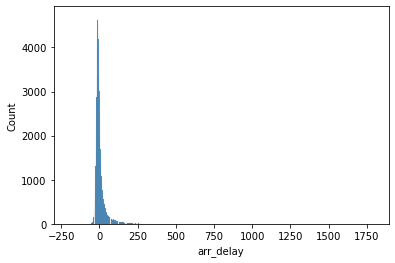

In [53]:
hist = sns.histplot(data = df['arr_delay'])